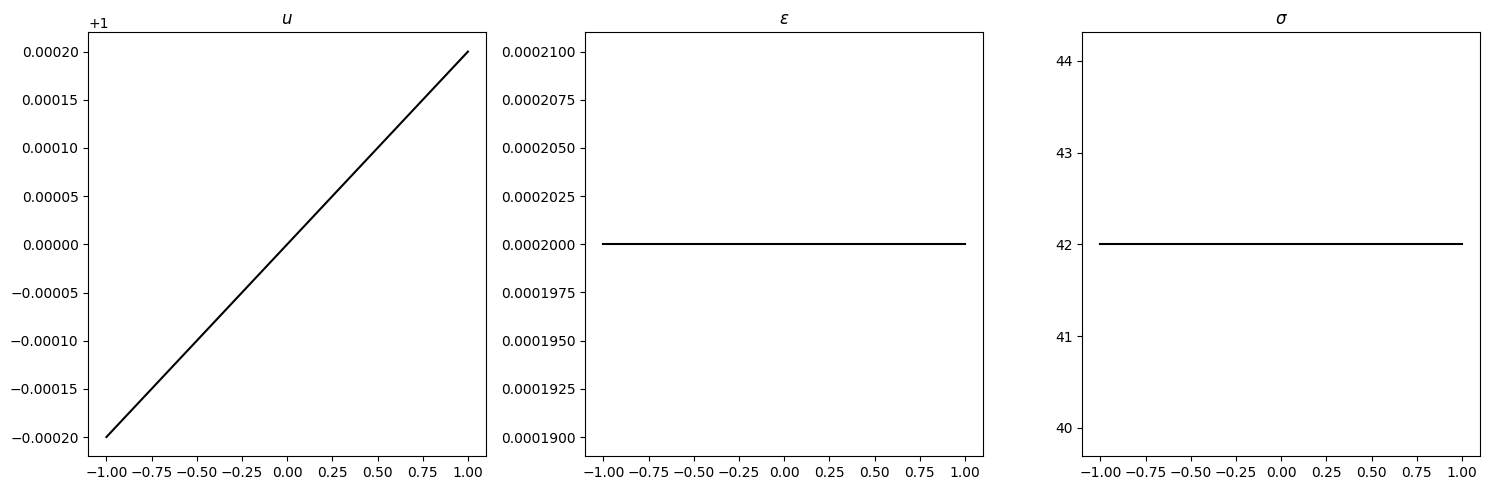

In [3]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

# Parâmetros e definição do perceptron (rede neural mais simples possível)
w = 200.0E-6  # Peso inicial do perceptron (200 micro-unidades)
b = 1.0       # Viés inicial do perceptron
model = torch.nn.Linear(1, 1)  # Define uma camada linear (perceptron) com 1 entrada e 1 saída

# Sobrescreve os pesos aleatórios iniciais com nossos valores definidos
model.weight.data = torch.tensor([[w]])  # Atribui o peso w ao perceptron
model.bias.data = torch.tensor([b])     # Atribui o viés b ao perceptron (corrigido de weight.bias para bias.data)

# Criação da malha espacial 1D para análise
nx = 5  # Número de pontos na malha
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)  # Cria vetor de posições e adiciona dimensão extra

# Amostragem do campo de deslocamento modelado pelo perceptron
d = model(x)  # Calcula os deslocamentos (saída do perceptron)

# Cálculo do gradiente do campo de deslocamento (derivada espacial)
dd_dx = grad(d, x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]  # du/dx

# Cálculo da deformação (para pequenas deformações, ε = du/dx)
eps = dd_dx  # Tensor de deformação simplificado (1D)

# Cálculo da tensão usando a Lei de Hooke (σ = E*ε)
E = 210000.0  # Módulo de Young (aço em MPa)
sig = E * eps  # Tensor de tensão

# Visualização dos resultados em gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Cria figura com 3 subplots

# Gráfico do deslocamento (u)
ax[0].plot(x.detach(), d.detach(), "k")  # Preto sólido
ax[0].set_title("$u$")  # Título em LaTeX

# Gráfico da deformação (ε)
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")  # Caractere especial epsilon

# Gráfico da tensão (σ)
ax[2].plot(x.detach(), sig.detach(), "k")
ax[2].set_title("$\\sigma$")  # Caractere especial sigma

fig.tight_layout()  # Ajusta layout para evitar sobreposição
plt.show()  # Exibe os gráficos
